In [2]:
import pandas as pd
import numpy as np

In [3]:
# Loading the dataset
df=pd.read_csv('Train_set.csv')
#df1=pd.read_csv('Test_set.csv')
df.head(3)
#df1.head(3)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0


In [4]:
df.shape

(93174, 23)

In [5]:
df_train=df.copy()
#df_test=df1.copy()

In [6]:
for col in df_train.columns:
    print(col)

ID
loan_amnt
loan_term
interest_rate
loan_grade
loan_subgrade
job_experience
home_ownership
annual_income
income_verification_status
loan_purpose
state_code
debt_to_income
delinq_2yrs
public_records
revolving_balance
total_acc
interest_receive
application_type
last_week_pay
total_current_balance
total_revolving_limit
default


In [7]:
df_train.shape

(93174, 23)

In [9]:
df_train.duplicated().any()

False

In [10]:
df_train.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [12]:
df_train['loan_term']=df_train['loan_term'].astype('category')


In [13]:
df_train['loan_grade']=df_train['loan_grade'].astype('category')

In [14]:
df_train['loan_subgrade']=df_train['loan_subgrade'].astype('category')

In [15]:
df_train['job_experience']=df_train['job_experience'].astype('category')

In [16]:
df_train['home_ownership']=df_train['home_ownership'].astype('category')

In [17]:
df_train['income_verification_status']=df_train['income_verification_status'].astype('category')

In [18]:
df_train['loan_purpose']=df_train['loan_purpose'].astype('category')

In [19]:
df_train['state_code']=df_train['state_code'].astype('category')

In [20]:
df_train['application_type']=df_train['application_type'].astype('category')

In [10]:
#df_train.drop('job_experience',axis=1, inplace=True)

In [11]:
#df_train.drop('total_current_balance',axis=1, inplace=True)

In [12]:
#df_train.drop('total_revolving_limit',axis=1, inplace=True)

In [13]:
#df_train.drop('last_week_pay',axis=1, inplace=True)

In [21]:
df_train.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [22]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


In [ ]:
XGBoost
LightBGM-Complete by Saturday
Put metrics for above four in excel file- Completeby Sunday

In [23]:
# data pre-processing

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# UNIVARIATE ANALYSIS

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df_train, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df_train, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df_train, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df_train, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df_train[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df_train[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# Observations on loan amount

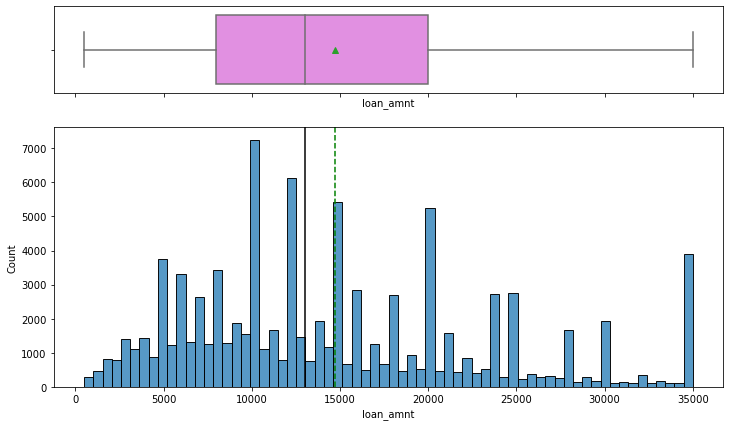

In [26]:
histogram_boxplot(df_train,'loan_amnt')

In [26]:
The range of loan amount goes till 35000 dollar and average of loan amount is $15000
No outliers which means no people goes beyond the loan amount of 35000 dollar

SyntaxError: invalid syntax (<ipython-input-26-43b667949ab9>, line 1)

# Observations on loan grade

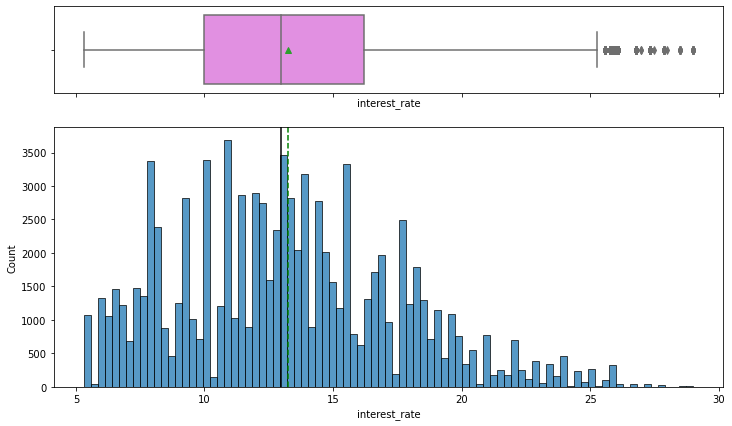

In [27]:
histogram_boxplot(df_train,'interest_rate' )

In [ ]:
The average interest rate lies between 13% to 15%
There are some interest rate which goes between 25% and 30% which clearly explains its difficult to pay the interest rate and 
the pricipal amount


# Observations on interest to be received

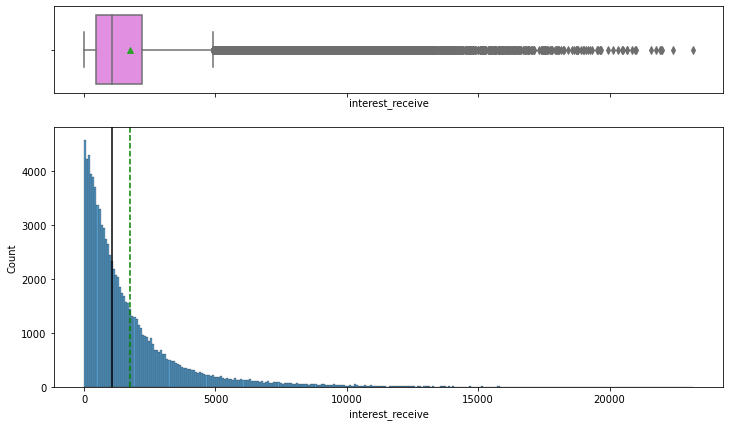

In [28]:
histogram_boxplot(df_train,'interest_receive')

In [ ]:
The average interest per person would be 2500 dollar
There are some outliers where people be able to pay the interest amount of more than 20000 dollar which is very expensive

# Observations on last_week_pay

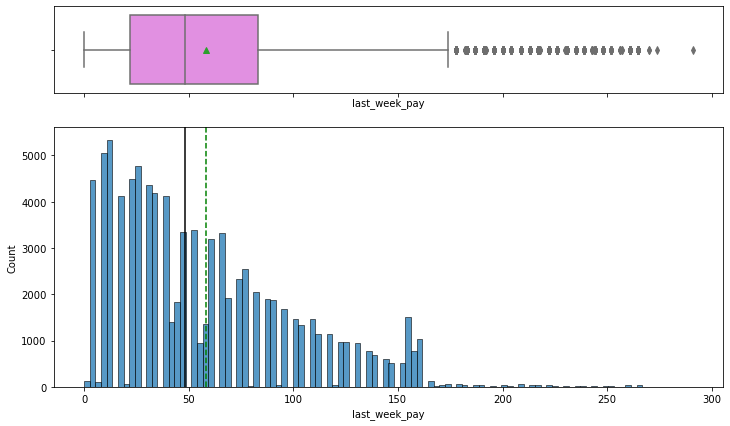

In [29]:
histogram_boxplot(df_train,'last_week_pay')

In [ ]:
Based on last week pay and their historical data how they paid, loan amount would be approved
The average last week pay would be 60 dollar and it goes beyond 300 as outlier
The last week pay outlier starts from 160 to 300 like half of the pay is considered as outliers

# Observations on total current balance

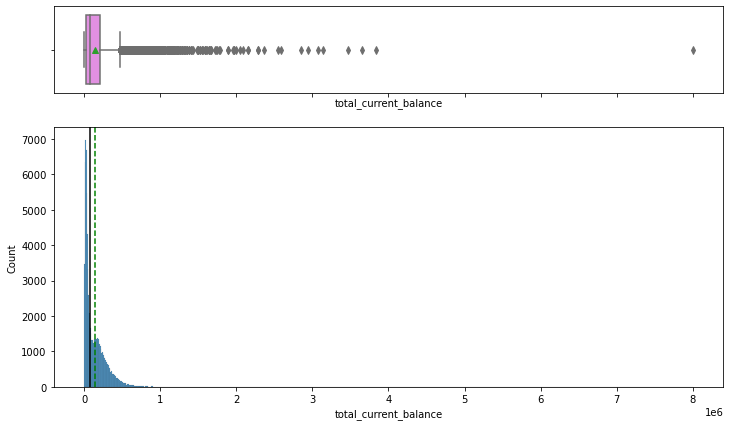

In [30]:
histogram_boxplot(df_train,'total_current_balance')

In [ ]:
People current balance lies between 500k dollar and some people current account balance goes beyond 
8000k dollar and it is considered as outlier

# Observations on annual income

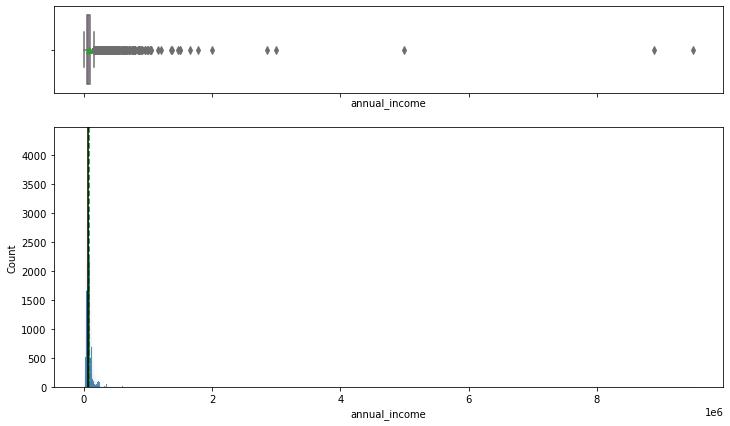

In [31]:
histogram_boxplot(df_train,'annual_income')

In [ ]:
The people average annual income is 100k dollar and few people are earning beyond 200k which will be 
considered as exceptional

# Observation on debt to income

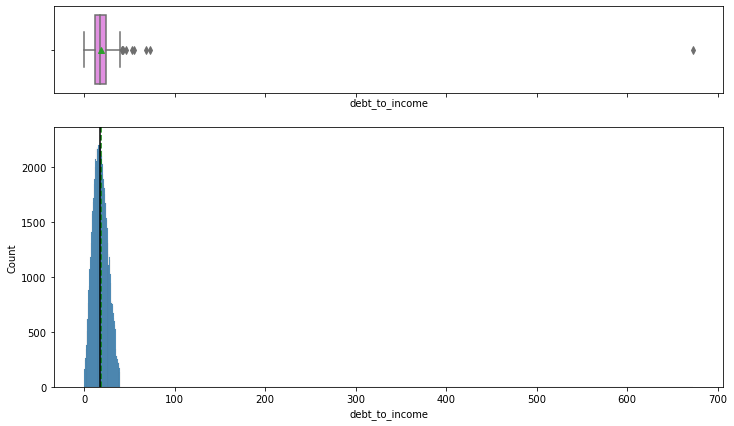

In [44]:
histogram_boxplot(df_train,'debt_to_income')

In [32]:
# function to create labeled barplots


def labeled_barplot(df_train, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df_train[feature])  # length of the column
    count = df_train[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df_train,
        x=feature,
        palette="Paired",
        order=df_train[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Observations on loan term 

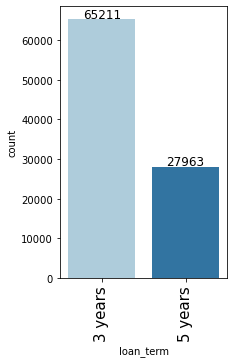

In [33]:
labeled_barplot(df_train,'loan_term', perc="TRUE")

In [ ]:
There are only 2 loan terms available
1) 3 years
2) 5 years

# Observations on loan_grade

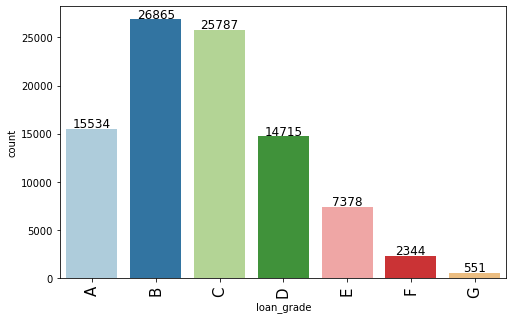

In [34]:
labeled_barplot(df_train,'loan_grade')

In [ ]:
Theres loan grade and it is divided into type of loan grade as
A,B,C,D,E,F,G and number of loan applicants can be identified for each type of loan grade

# Observations on loan_subgrade

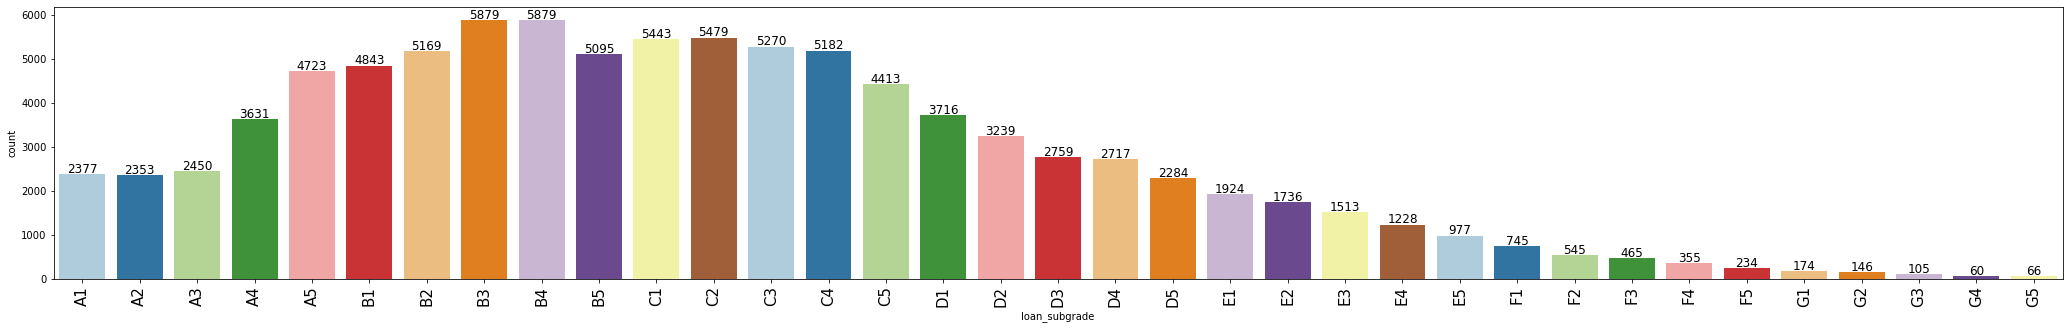

In [35]:
labeled_barplot(df_train,'loan_subgrade')

In [ ]:
Each Loan grade has its own subgrade and number of loan subgrades has been divided and counted

# Observations on job_experience

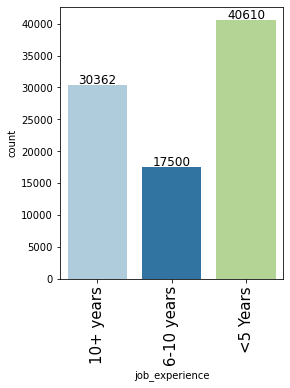

In [36]:
labeled_barplot(df_train,'job_experience')

In [ ]:
Based on applicants job experience loan will be provided and applicant will be put under loan term and loan grade.
Job expeience plays one of the most vital role in providing loan

# Observations on home ownership

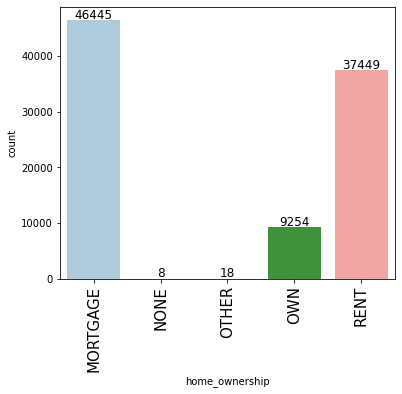

In [37]:
labeled_barplot(df_train,'home_ownership')

In [ ]:
Checking the applicant status whether they are holding their own house or staying for rent or mortgage or they dont have any 
or other

# Observations on income verification status

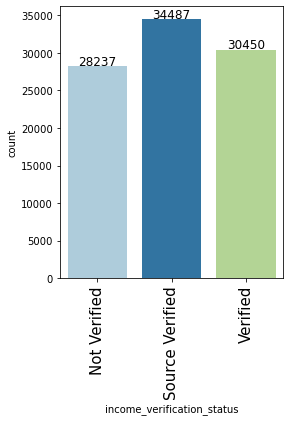

In [38]:
labeled_barplot(df_train,'income_verification_status')

In [ ]:
Need to verifiy the applicants income status and its very important for the bank to decide whether loan will be approved 
or denied
There are applicants status which is not verified would be in difficult stage to approve their loan

# Observations on application_type

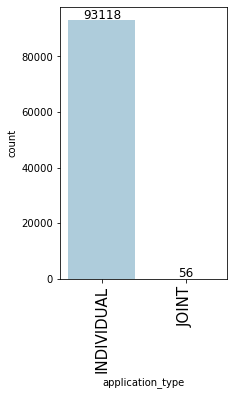

In [39]:
labeled_barplot(df_train,'application_type')

In [ ]:
Checking whether the applicants is applying individually or as join type and if joint type, we need to collect the other persons
details to store in our database

# Observations on loan purpose

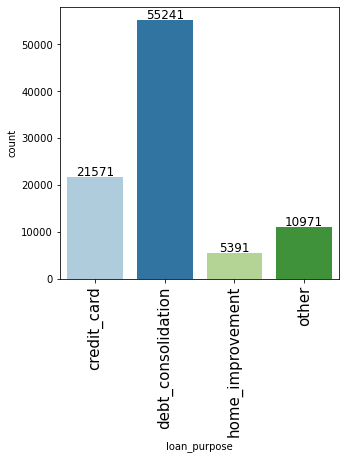

In [40]:
labeled_barplot(df_train,'loan_purpose')

In [ ]:
Most of the applicant apply loan for debt consolidation
second biggest applicant is to apply for credit_card

# Observations on state code

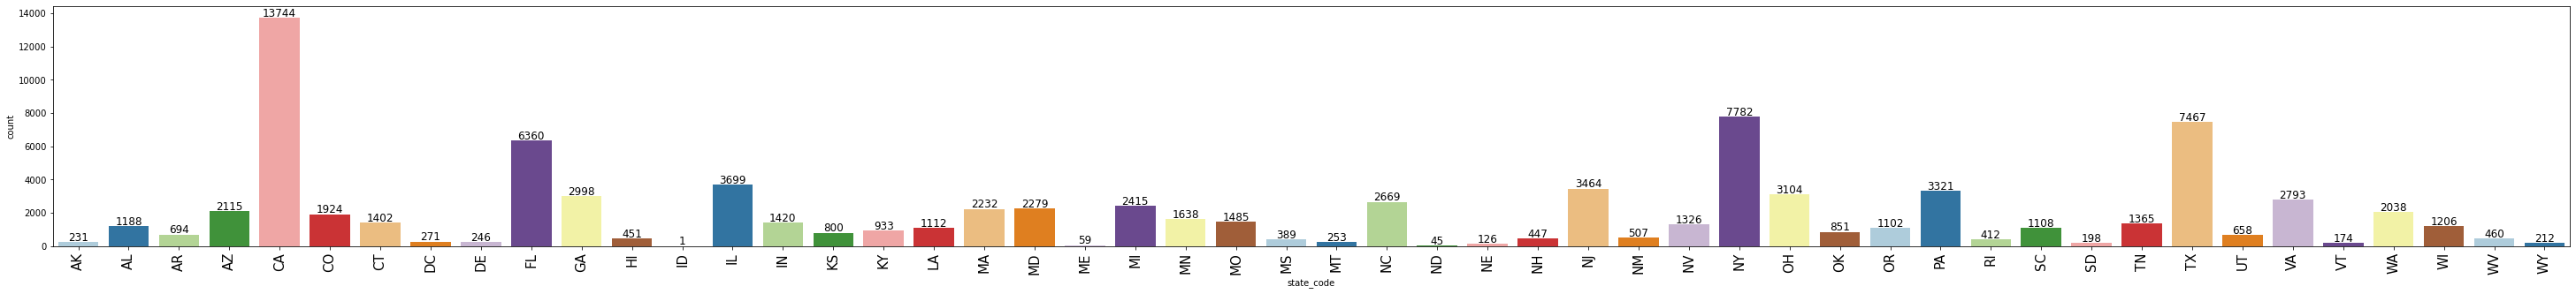

In [41]:
labeled_barplot(df_train,'state_code')

In [ ]:
State code CA has received more applicants 
NY and TX has received more comapred to state CA
Applicants from most of the state has applied for loan

# BIVARIATE ANALYSIS

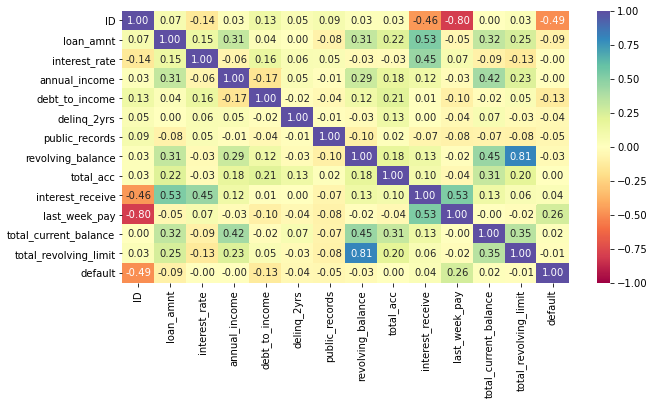

In [43]:
cols_list = df_train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df_train[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
Comparing the two features using correaltion. 
It checks the relationship between 2 variables
Revolving balance and total revolving limit stays in pesitive side
Most of the feature holds positive and very less negative side of features


In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df_train, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df_train[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df_train[df_train[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df_train[df_train[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df_train, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df_train,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [46]:
def stacked_barplot(df_train, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df_train[predictor].nunique()
    sorter = df_train[target].value_counts().index[-1]
    tab1 = pd.crosstab(df_train[predictor], df_train[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df_train[predictor], df_train[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Observations on loan term and interest rate

loan_grade      A      B      C      D     E     F    G    All
loan_term                                                     
All         15534  26865  25787  14715  7378  2344  551  93174
5 years       551   4470   8829   6620  5154  1873  466  27963
3 years     14983  22395  16958   8095  2224   471   85  65211
------------------------------------------------------------------------------------------------------------------------


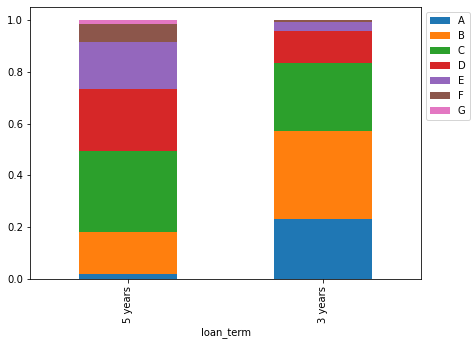

In [47]:
stacked_barplot(df_train,'loan_term','loan_grade')

In [ ]:
Under 3-years loan term, loan grade G is not avilable
Under 3-years loan term, more applicants received
Under 5-years loan term, A grade applicants and G grade applicants are very less

# Observations on loan grade and job experience

job_experience  10+ years  6-10 years  <5 Years    All
loan_grade                                            
All                 30362       17500     40610  88472
B                    8722        5064     11714  25500
C                    8356        4961     11109  24426
A                    5150        2830      6880  14860
D                    4776        2678      6442  13896
E                    2402        1402      3204   7008
F                     779         457      1012   2248
G                     177         108       249    534
------------------------------------------------------------------------------------------------------------------------


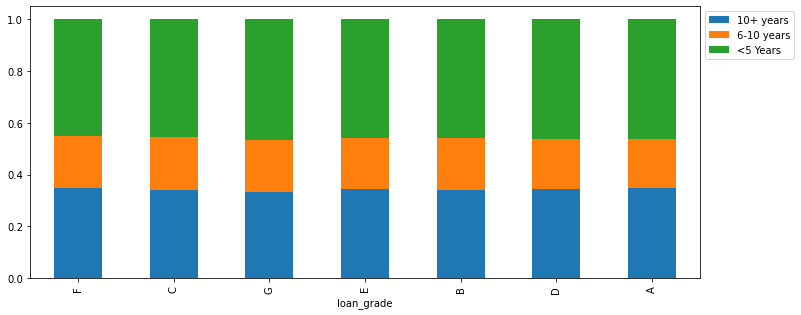

In [48]:
stacked_barplot(df_train,'loan_grade','job_experience')

In [ ]:
Loan grade and job experience are averagely calculated

# Observation on annual income and income verification status

application_type            INDIVIDUAL  JOINT    All
income_verification_status                          
All                              93118     56  93174
Verified                         30425     25  30450
Not Verified                     28221     16  28237
Source Verified                  34472     15  34487
------------------------------------------------------------------------------------------------------------------------


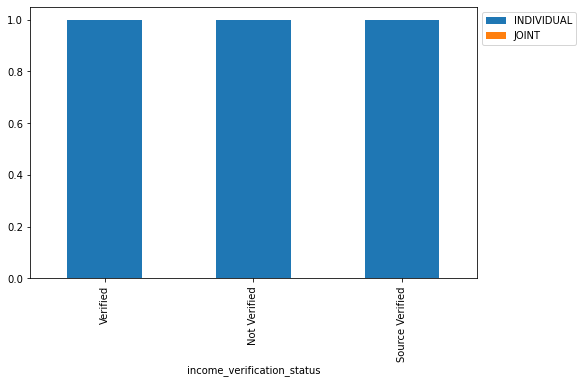

In [49]:
stacked_barplot(df_train,'income_verification_status','application_type')

In [ ]:
Theres no joint applicant based on income verification status
All the applicants are applied individually

# Observation on application type and default

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


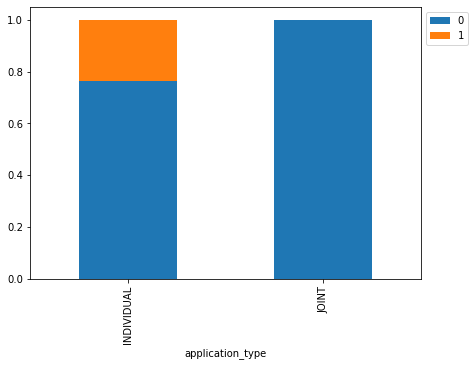

In [50]:
stacked_barplot(df_train,'application_type','default')

In [ ]:
Individual applicants has default of yes and no 
Joint has no applicants as the default says no

# Observation on income verification status and default

default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


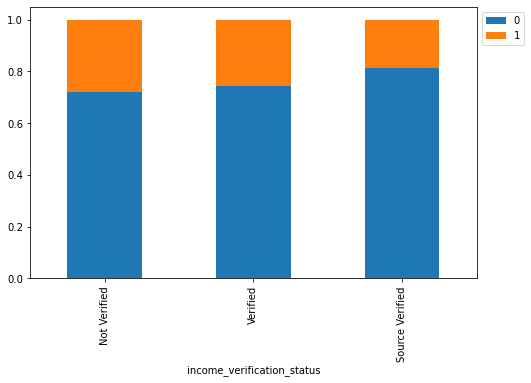

In [51]:
stacked_barplot(df_train,'income_verification_status','default')

In [ ]:
All type of income verification status has defauld of yes and no

In [52]:
df_train.head(3)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0


In [53]:
dict_loan_term={"3 years":0,"5 years":1}
df1=df_train.replace({"loan_term":dict_loan_term})

In [54]:
dict_loan_grade={"A":1,"B":2,"C":3,"D":4,"E":5,"G":6}
df1=df_train.replace({"loan_grade":dict_loan_grade})


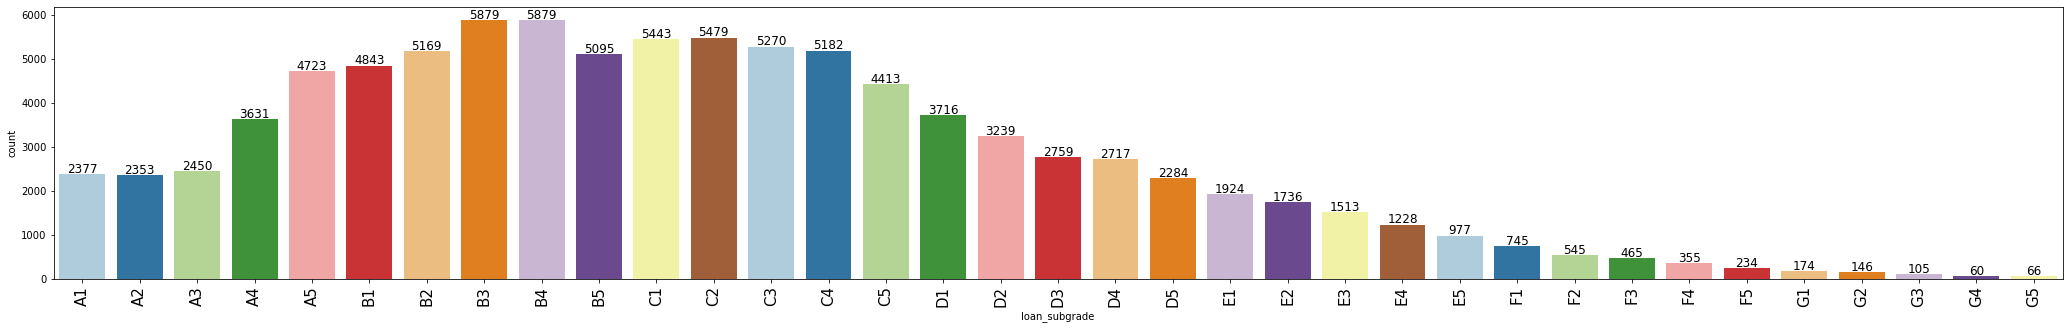

In [54]:
labeled_barplot(df_train,'loan_subgrade')

In [56]:
dict_loan_subgrade={"A1":0,"A2":1,"A3":2,"A4":3,"A5":4,"B1":0,"B2":1,"B3":2,"B4":3,"B5":4,
                    "C1":0,"C2":1,"C3":2,"C4":3,"C5":4,"D1":0,"D2":1,"D3":2,"D4":3,"D5":4,
                    "E1":0,"E2":1,"E3":2,"E4":3,"E5":4,"F1":0,"F2":1,"F3":2,"F4":3,"F5":4,
                    "G1":0,"G2":1,"G3":2,"G4":3,"G5":4
                   }
df1=df_train.replace({"loan_subgrade":dict_loan_subgrade})

In [57]:
dict_job_experience={"NaN":0,"<5 Years":1,"6-10 years":2,"10+ years":3,"10+ Years":3}
df1=df_train.replace({"job_experience":dict_job_experience})

In [59]:
dict_home_ownership={"NONE":0,"RENT":1,"MORTGAGE":2,"OWN":3,"OTHER":4}
df1=df_train.replace({"home_ownership":dict_home_ownership})

In [60]:
dict_income_status={"Not Verified":0,"Verified":1,"Source Verified":2}
df1=df_train.replace({"income_verification_status":dict_income_status})

In [61]:
dict_application_type={"JOINT":0,"INDIVIDUAL":1}
df1=df_train.replace({"application_type":dict_application_type})

In [63]:
dict_loan_purpose={"credit_card":0,"debt_consolidation":1,"home_improvement":2,"other":3}
df1=df_train.replace({"loan_purpose":dict_loan_purpose})

In [62]:
dict_last_week_pay=({"NaN":0})
df1=df_train.replace({"last_week_pay":dict_last_week_pay})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [64]:
dict_total_current_balance=({"NaN":0})
df1=df_train.replace({"total_current_balance":dict_total_current_balance})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [65]:
dict_total_revolving_limit=({"NaN":0})
df1=df_train.replace({"total_revolving_limit":dict_total_revolving_limit})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [66]:
df1=df_train.replace({"loan_term":dict_loan_term,"loan_grade":dict_loan_grade,"loan_subgrade":dict_loan_subgrade,
                      "job_experience":dict_job_experience,"loan_purpose":dict_loan_purpose,
                      "home_ownership":dict_home_ownership,"income_verification_status":dict_income_status,
                      "application_type":dict_application_type})

In [67]:
df1.sample(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
28281,1961491,33425,0,12.12,2,2,3.0,2,75000.0,2,...,0.0,0.0,41013,18.0,6607.79,1,152.0,118092.0,47800.0,1
25511,830614,12000,0,7.66,1,4,1.0,1,125000.0,0,...,0.0,0.0,34991,20.0,1313.44,1,109.0,NaN,NaN,1
49195,2386929,4400,0,14.33,3,0,2.0,1,53200.0,1,...,0.0,0.0,7604,53.0,196.80,1,43.0,109686.0,27400.0,1
85605,35062184,20000,1,10.99,2,2,3.0,3,95000.0,2,...,0.0,0.0,28223,20.0,2254.97,1,56.0,31146.0,50400.0,0
53326,8707493,6375,0,12.35,2,3,3.0,2,71500.0,2,...,0.0,0.0,32909,24.0,876.88,1,70.0,202228.0,43200.0,1


In [94]:
#df_train.replace(to_replace=['loan_term','loan_grade','loan_subgrade','job_experience','home_ownership','income_verification_status','application_type'],value=[0,1,2,3,4,5,6],inplace=True)

In [68]:
df1['annual_income']=df1['annual_income'].replace(np.NaN,0)

In [69]:
df1['annual_income'].isnull().sum()

0

In [70]:
df1['delinq_2yrs']=df1['delinq_2yrs'].replace(np.NaN,0)

In [71]:
df1['public_records']=df1['public_records'].replace(np.NaN,0)

In [72]:
df1['job_experience']=df1['job_experience'].replace(np.NaN,0)

In [73]:
df1['last_week_pay']=df1['last_week_pay'].replace(np.NaN,0)

In [74]:
df1['total_current_balance']=df1['total_current_balance'].replace(np.NaN,0)

In [75]:
df1['total_revolving_limit']=df1['total_revolving_limit'].replace(np.NaN,0)

In [84]:
df1['total_acc']=df1['total_acc'].replace(np.NaN,0)

In [76]:
#Changing float to int values

In [77]:
df1['interest_rate']=df1['interest_rate'].astype(int)

In [78]:
df1['debt_to_income']=df1['debt_to_income'].astype(int)

In [79]:
df1['revolving_balance']=df1['revolving_balance'].astype(int)

In [80]:
df1['interest_receive']=df1['interest_receive'].astype(int)

In [81]:
df1['interest_receive']=df1['interest_receive'].astype(int)

In [82]:
df1.sample(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
45562,4234278,9600,0,14,3,0,1.0,1,71000.0,0,...,0.0,0.0,38290,48.0,2221,1,148.0,59367.0,42600.0,0
64981,60235203,9600,0,7,1,3,3.0,3,45000.0,0,...,1.0,0.0,21616,32.0,268,1,26.0,44943.0,45300.0,0
4006,16522118,9600,0,9,2,0,2.0,1,49000.0,0,...,0.0,0.0,4448,14.0,676,1,65.0,37566.0,20500.0,1
29793,40010099,5000,0,7,1,3,3.0,1,30000.0,0,...,0.0,0.0,7211,16.0,341,1,57.0,8715.0,11600.0,0
89088,60012259,15000,1,13,3,3,0.0,1,38768.0,1,...,0.0,0.0,21078,61.0,888,1,26.0,22372.0,29000.0,0


In [85]:
df1.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [87]:
df1.sample(4)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
49874,71316414,5000,0,11,2,4,0.0,1,36502.0,1,...,0.0,1.0,986,12.0,43,1,4.0,6727.0,3775.0,0
11114,5025971,28000,1,17,3,4,1.0,2,75000.0,1,...,0.0,0.0,25352,26.0,6858,1,83.0,271863.0,43484.0,1
77589,43998614,16200,0,13,3,2,2.0,2,120000.0,0,...,0.0,4.0,3648,15.0,1585,1,43.0,459365.0,5900.0,0
31166,8117953,25200,1,18,5,0,1.0,2,52500.0,2,...,0.0,1.0,21570,24.0,5315,1,61.0,24636.0,45600.0,1


# XGBOOST

In [88]:
from xgboost import XGBClassifier

In [89]:
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [91]:
# Library to split data
from sklearn.model_selection import train_test_split

In [106]:
# Dropping the target variable 
X=df1.drop(['default'],axis=1)
Y=df1['default']

#X=pd.get_dummies(X,columns=['state_code'])
#Splitting the dataset into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)


In [107]:
print("Shape of train set", X_train.shape)
print("******************************")
print("Shape of test set", X_test.shape)

Shape of train set (65221, 19)
******************************
Shape of test set (27953, 19)


In [108]:
X_train.sample(5)

,loan_amnt,loan_term,interest_rate,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
76051,20000,1,13,3,1.0,1,71000.0,2,0,9,0.0,0.0,19988,16.0,1982,1,39.0,23735.0,28300.0
91570,25000,1,21,1,3.0,2,265000.0,1,1,1,1.0,1.0,10129,53.0,5966,1,65.0,10129.0,15200.0
28992,4125,0,17,4,1.0,1,15000.0,0,0,12,0.0,0.0,5784,13.0,701,1,65.0,13284.0,9700.0
21374,10000,0,6,1,2.0,2,39000.0,0,1,12,0.0,0.0,7005,42.0,550,1,52.0,48967.0,48900.0
4845,28750,0,15,0,0.0,2,62520.0,1,0,24,0.0,0.0,31338,22.0,1421,1,17.0,194860.0,42800.0


In [100]:
df1.drop('ID',axis=1, inplace=True)

In [101]:
df1.drop('loan_grade',axis=1,inplace=True)

In [103]:
df1.drop('state_code',axis=1,inplace=True)

In [104]:
df1.sample(4)

,loan_amnt,loan_term,interest_rate,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
68976,5000,0,12,0,1.0,2,30000.0,2,2,8,1.0,0.0,5659,15.0,329,1,35.0,79116.0,7100.0,0
68668,8000,0,9,0,1.0,2,42418.0,0,1,21,1.0,0.0,8780,32.0,1092,1,109.0,101479.0,20500.0,0
31297,9000,0,10,2,1.0,2,125000.0,2,1,15,0.0,0.0,10376,9.0,278,1,13.0,107554.0,12000.0,1
22213,19725,0,14,1,2.0,2,80000.0,0,1,3,0.0,0.0,7047,16.0,3812,1,95.0,145003.0,13300.0,0


In [ ]:
# annual_income,delinq_2yrs,public_records,job_experience,last_week_pay,total_current_balance,total_revolving_limit

In [ ]:
# replacing NaN values with 0

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [109]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

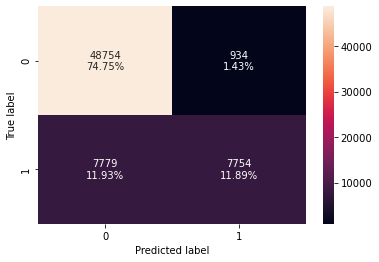

In [110]:
confusion_matrix_sklearn(xgb_classifier, X_train, Y_train)

In [111]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, Y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.866408,0.499195,0.892495,0.640271


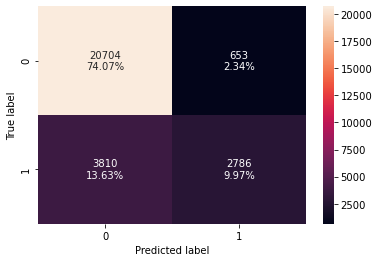

In [112]:
confusion_matrix_sklearn(xgb_classifier, X_test, Y_test)

In [113]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, Y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.840339,0.422377,0.810119,0.555257


# RANDOM FOREST

In [115]:
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

In [116]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

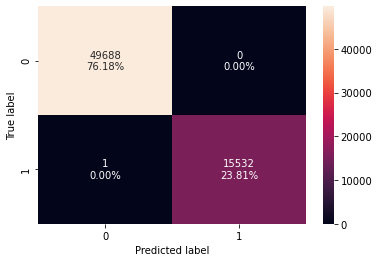

In [117]:
confusion_matrix_sklearn(rf_estimator, X_train, Y_train)

In [118]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, Y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999985,0.999936,1.0,0.999968


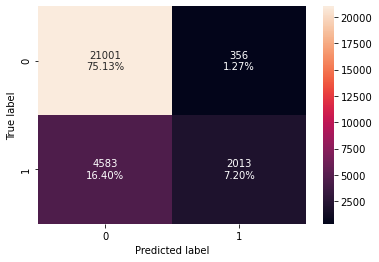

In [119]:
confusion_matrix_sklearn(rf_estimator, X_test, Y_test)

In [120]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, Y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.823311,0.305185,0.849726,0.44908


# LIGHTGBM

In [121]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier(objective='binary')

In [122]:
# predict the results
y_pred=clf.predict(X_test)

In [123]:
# Calculating different metrics
lightgbm_estimator_model_train_perf = model_performance_classification_sklearn(
    clf, X_train, Y_train
)
lightgbm_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.8236,0.311208,0.857092,0.456619


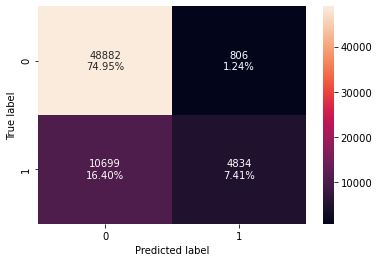

In [126]:
confusion_matrix_sklearn(clf, X_train, Y_train)

In [124]:
# Calculating different metrics
lightgbm_estimator_model_train_perf = model_performance_classification_sklearn(
    clf, X_test, Y_test
)
lightgbm_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.823311,0.307459,0.845352,0.450917


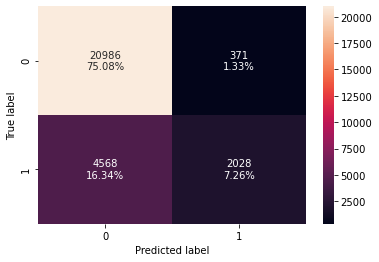

In [125]:
confusion_matrix_sklearn(clf, X_test, Y_test)

In [20]:
#df_test.isnull().sum()

In [16]:
#df_test.drop('job_experience',axis=1, inplace=True)

In [17]:
#df_test.drop('last_week_pay',axis=1, inplace=True)

In [18]:
#df_test.drop('total_current_balance',axis=1, inplace=True)

In [19]:
#df_test.drop('total_revolving_limit',axis=1, inplace=True)

In [20]:
X=df_train.drop(['default'],axis=1)
Y=df_train['default']

X = pd.get_dummies(X, drop_first=True)

In [21]:
df_train.head(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,default
0,72199369,9000,3 years,9.17,B,B2,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,0
1,14257956,18000,3 years,13.65,C,C1,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,0
2,66216451,16000,3 years,7.26,A,A4,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,0
3,46974169,25000,3 years,13.99,C,C4,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,0
4,46725961,17000,3 years,6.39,A,A2,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,0


In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:
scaler = StandardScaler()
print(scaler.fit(df_train['loan_amnt']))

ValueError: Expected 2D array, got 1D array instead:
array=[ 9000. 18000. 16000. ...  8000. 35000. 10000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)



print('Training Performace:',X_train.shape)

print('Validation Performance', X_val.shape)




Training Performace: (65221, 110)
Validation Performance (27953, 110)


In [63]:
X_train.columns

Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive',
       ...
       'state_code_TN', 'state_code_TX', 'state_code_UT', 'state_code_VA',
       'state_code_VT', 'state_code_WA', 'state_code_WI', 'state_code_WV',
       'state_code_WY', 'application_type_JOINT'],
      dtype='object', length=110)

In [25]:
import sys
!{sys.executable} -m pip install xgboost

In [26]:
from xgboost import XGBClassifier
    

In [27]:
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## XGBOOST

In [28]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [29]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [55]:
from lightgbm import LGBMClassifier

# LightGBM parameters found by Bayesian optimization
clf = LGBMClassifier(boosting_type='gbdt',
learning_rate=0.1, max_depth=-1, metric='auc',
min_child_samples=311, min_child_weight=1, min_split_gain=0.0,
n_estimators=10000, num_leaves=7)


clf.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val,Y_val)], 
    eval_metric= 'auc', verbose= 100, early_stopping_rounds= 30)

Train until valid scores didn't improve in 30 rounds.
[100]	training's auc: 0.909782	valid_1's auc: 0.899766
[200]	training's auc: 0.922851	valid_1's auc: 0.911218
[300]	training's auc: 0.929258	valid_1's auc: 0.915853
[400]	training's auc: 0.933224	valid_1's auc: 0.918131
[500]	training's auc: 0.936226	valid_1's auc: 0.919695
[600]	training's auc: 0.938919	valid_1's auc: 0.920974
[700]	training's auc: 0.941041	valid_1's auc: 0.921826
[800]	training's auc: 0.943135	valid_1's auc: 0.922758
[900]	training's auc: 0.944847	valid_1's auc: 0.923367
Early stopping, best iteration is:
[945]	training's auc: 0.94569	valid_1's auc: 0.923523


LGBMClassifier(metric='auc', min_child_samples=311, min_child_weight=1,
               min_split_gain=0.0, n_estimators=10000, num_leaves=7,
               objective='binary')

In [30]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [31]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, Y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.905353,0.732795,0.848039,0.786216


In [32]:
xgb_classifier_model_val_perf = model_performance_classification_sklearn(
    xgb_classifier, X_val, Y_val
)
xgb_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.873323,0.647989,0.781329,0.70844


In [56]:
X_test= pd.get_dummies(df_test, drop_first=True)

In [57]:
X_test.shape

(39933, 110)

In [35]:
predicted_result = xgb_classifier.predict(X_test)

In [58]:

predicted_result_lgbm = clf.predict(X_test)

In [59]:
predicted_result_lgbm[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [60]:
X_test["default"] = predicted_result

In [43]:
X_test.columns[-1]

'default'

In [61]:
sub0 = X_test[["ID","default"]]
sub0.head(5)

,ID,default
0,4855329,1
1,66862420,0
2,3637416,1
3,53682249,0
4,53937165,0


In [62]:
sub0.to_csv("D:/GreatLearing/Hackathon/Sumbission_LGBM.csv")